vertical lolipop plot

랭킹

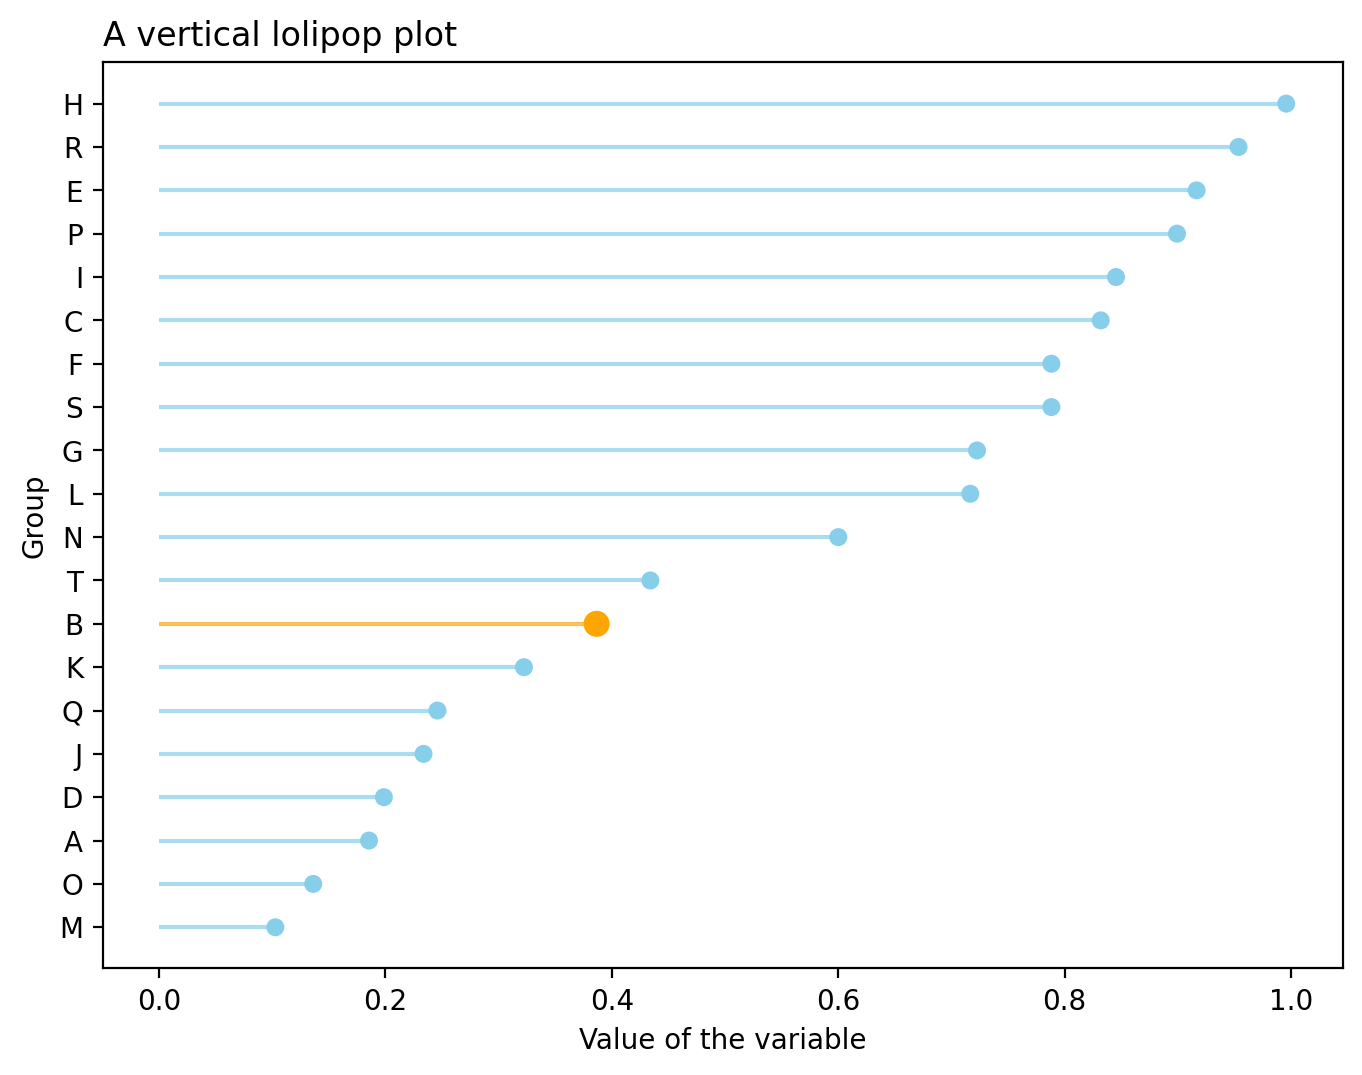

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe
np.random.seed(71)
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20)})
 # Reorder it following the values:
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
fig,ax=plt.subplots(1,1,figsize=(8,6),dpi=200)
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature

my_color=np.where(ordered_df['group']=='B','orange','skyblue')
my_size=np.where(ordered_df['group']=='B',70,30)

ax.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color=my_color,alpha=0.7)
# 순서 : 값(x) , 순서(y), 끝처리'o'
ax.scatter(x=ordered_df['values'],y=my_range,s=my_size,color=my_color) 
# Add titles and axis names

# 순서, 라벨
ax.set_yticks(my_range)
ax.set_yticklabels(ordered_df['group'])
ax.set_title("A vertical lolipop plot", loc='left')

ax.set_xlabel('Value of the variable')
ax.set_ylabel('Group')

plt.show()

word cloud

랭킹

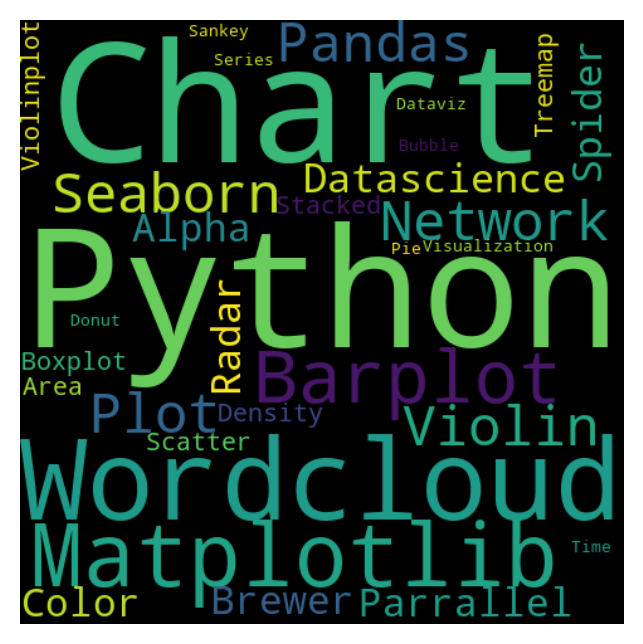

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Python Python Python Matplotlib Matplotlib Seaborn Network Plot Violin Chart Pandas Datascience Wordcloud Spider Radar Parrallel Alpha Color Brewer Density Scatter Barplot Barplot Boxplot Violinplot Treemap Stacked Area Chart Chart Visualization Dataviz Donut Pie Time-Series Wordcloud Wordcloud Sankey Bubble")

# Create the wordcloud object

fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)
 
# Display the generated image:
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
ax.margins(x=0, y=0)

plt.show()


This example follows the chart #390 where only one individual was plotted on the radar chart.   

Once you understood the method, it is quite easy to apply it to more individuals.

Note that if you have more than 2 or 3 individuals,   

I strongly advise to use faceting instead of displaying all of them on the same plot: spider charts become quickly unreadable.

랭킹

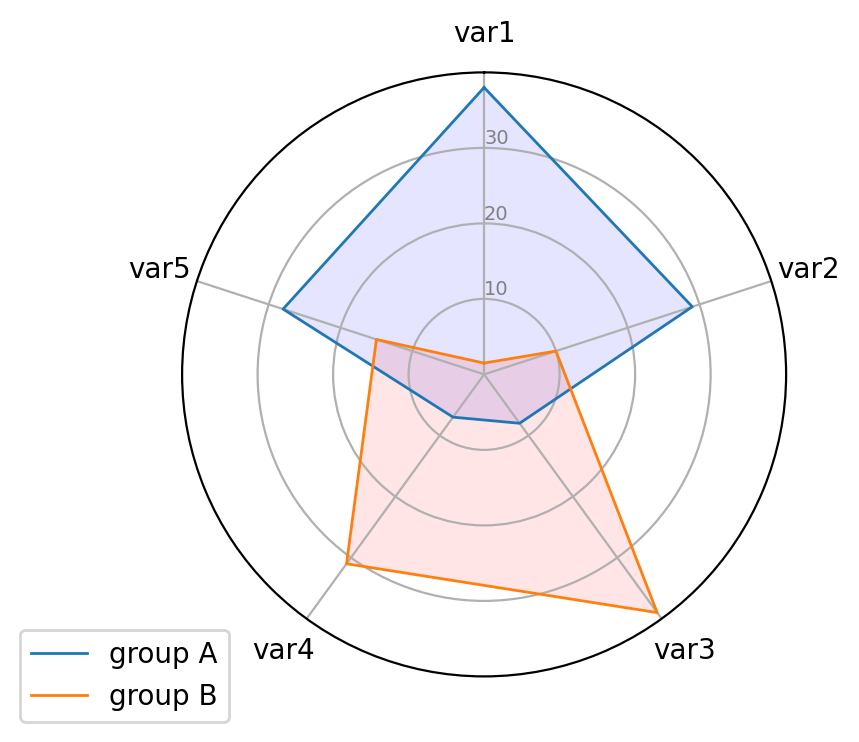

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:] # var1,2,3,4
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
fig=plt.figure(figsize=(6,4),dpi=200)
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
# PREVIOUS POST
#390 Basic radar chart


tree plot

랭킹

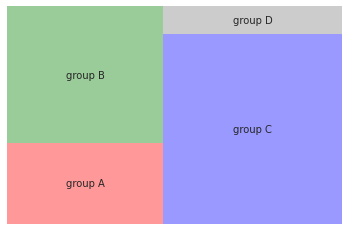

In [41]:
import squarify
import matplotlib.pyplot as plt

squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], color=["red","green","blue", "grey"], alpha=.4 )
plt.axis('off')
plt.show()


donut plot - plotly

parallel plot

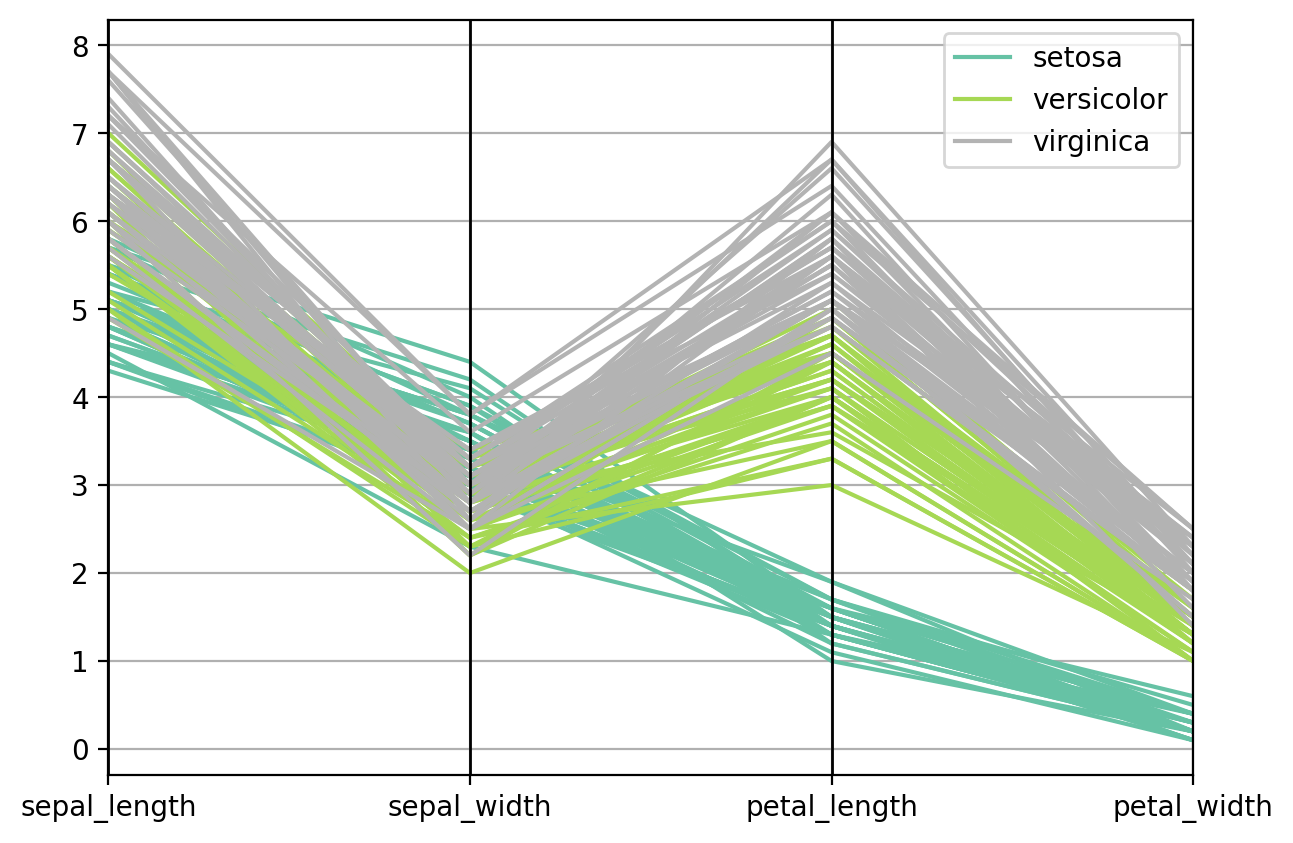

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

data = sns.load_dataset('iris')
 
fig,ax=plt.subplots(1,1,figsize=(7,5),dpi=200)
# Make the plot
parallel_coordinates(data, 'species', colormap=plt.get_cmap("Set2"),ax=ax)

plt.show()


bubble plot  

A bubble plot is a scatterplot with a third dimension: the size of the markers.  
It is even possible to add a fourth dimension using colors. this is possible using the ‘cmap‘ argument of the scatter function of matplotlib.

상관관계

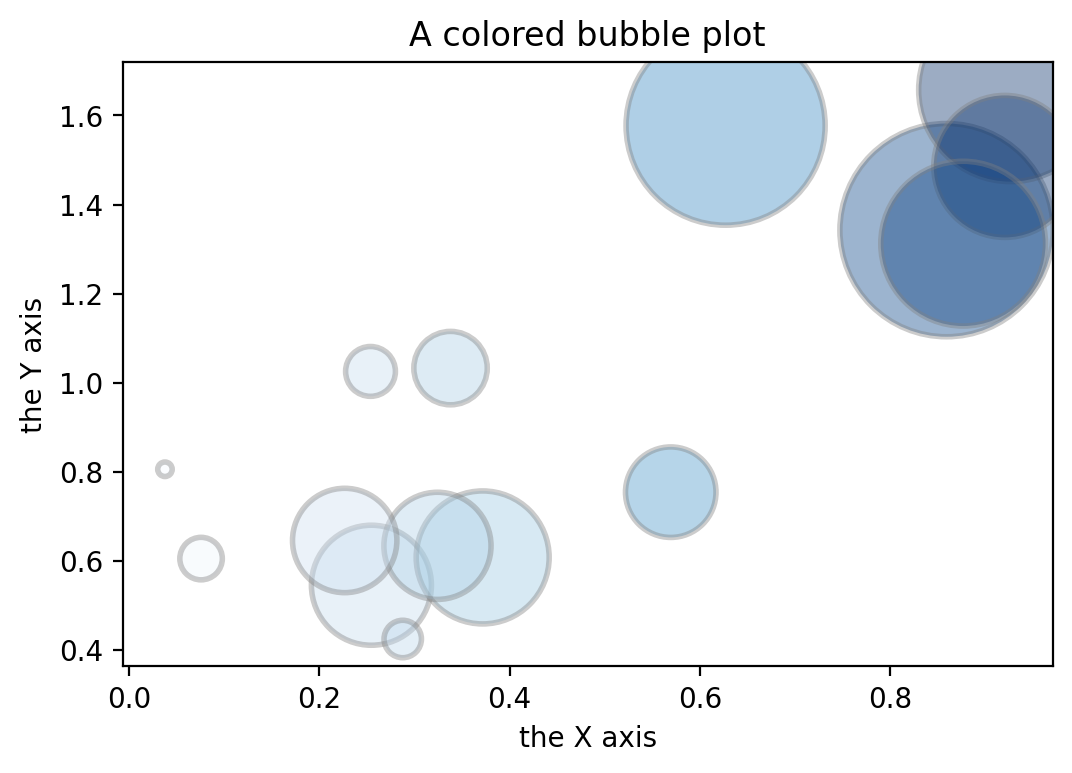

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# create data
x = np.random.rand(15)
y = x+np.random.rand(15)
z = x+np.random.rand(15)
z=z*z
 
# Change color with c and alpha. I map the color to the X axis value

# x,y 2차원 사이즈로 3차원 색깔로 4차원.
fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)
ax.scatter(x, y, s=z*2000, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
ax.set_xlabel("the X axis")
ax.set_ylabel("the Y axis")
ax.set_title("A colored bubble plot")
 
plt.show()


A percent stacked barchart is almost the same as a stacked barchart.    

Subgroups are displayed on of top of each other,   
but data are normalised to make in sort that the sum of every subgroups is 100.

전체 비율

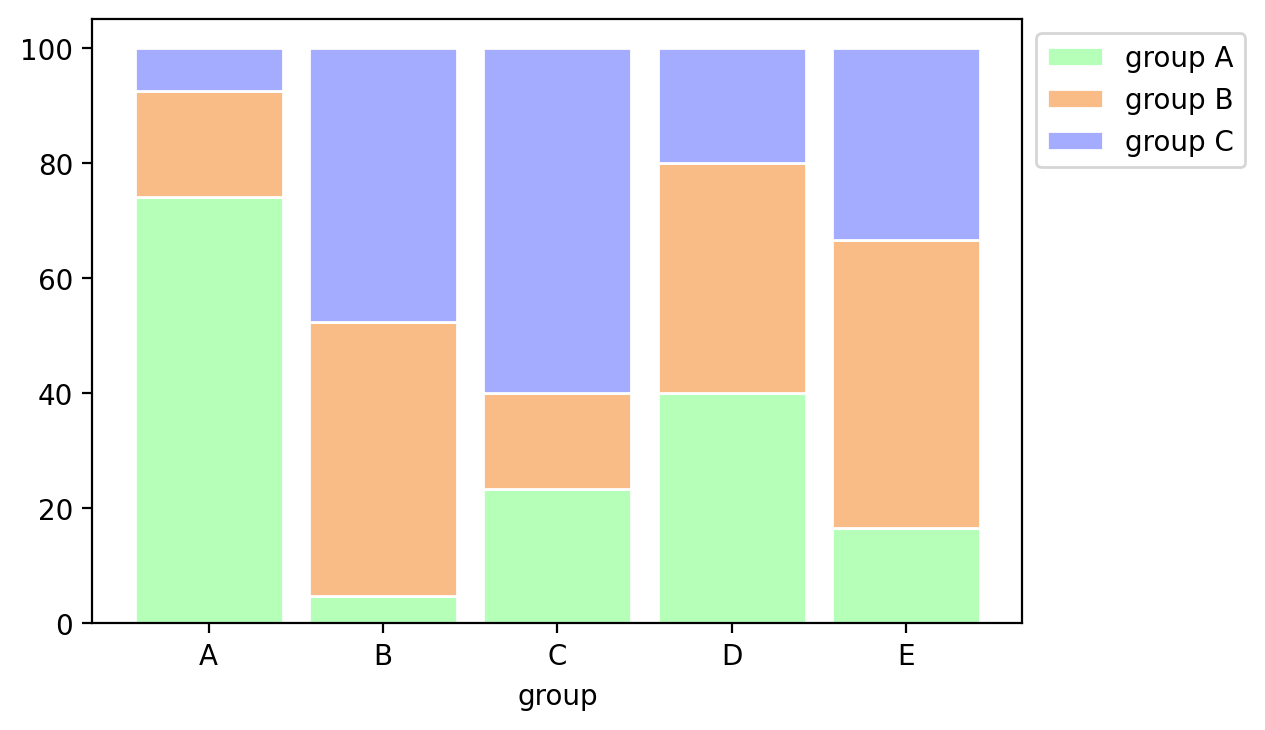

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [20, 1.5, 7, 10, 5], 'orangeBars': [5, 15, 5, 10, 15],'blueBars': [2, 15, 18, 5, 10]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85
names = ('A','B','C','D','E')

fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)
# Create green Bars
ax.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth,label='group A')
# Create orange Bars
ax.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth,label='group B')
# Create blue Bars
ax.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth, label='group C')
 
# Custom x axis
ax.set_xticks(r)
ax.set_xticklabels(names)
ax.set_xlabel("group")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

network plot

흐름

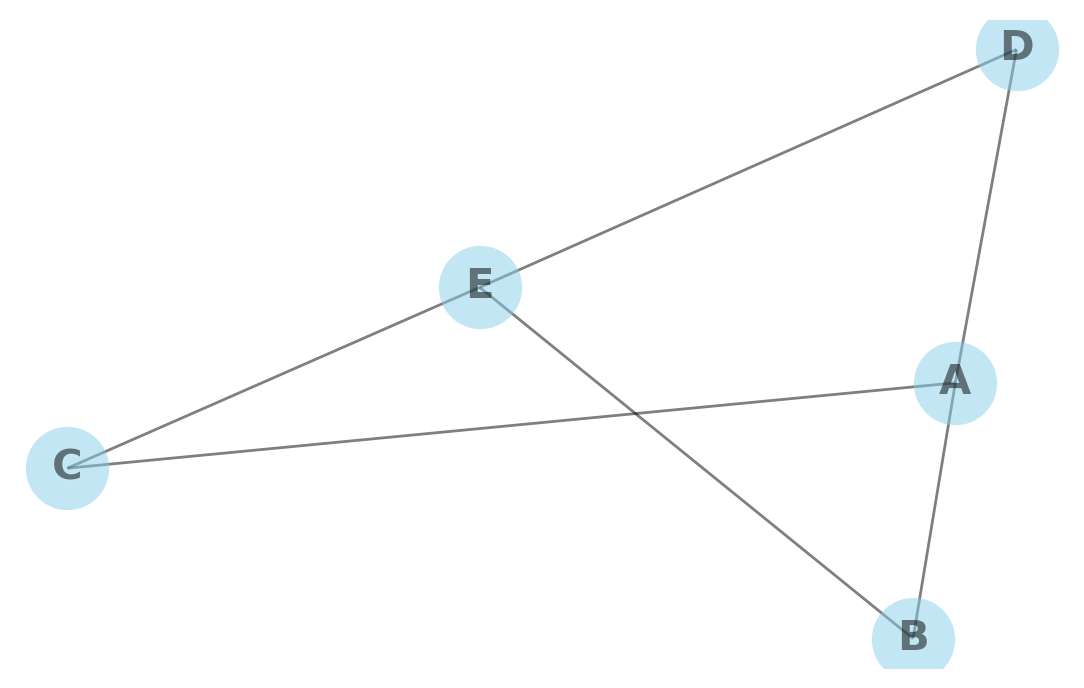

In [11]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A','E','D'], 'to':['D', 'A', 'E','C','B','E']})

fig,ax=plt.subplots(1,1,figsize=(6,4),dpi=200)
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Graph with Custom nodes:
nx.draw(G, with_labels=True, node_size=100, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=20,ax=ax,
        font_weight='bold',font_size=15)
plt.show()

sankey flow

In [56]:
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()

highlight plot

증가 

Text(0, 0.5, 'Score')

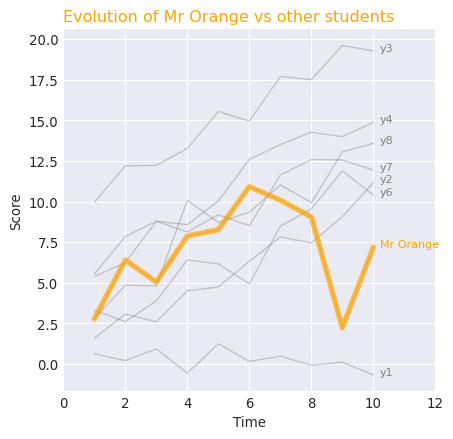

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make a data frame
df=pd.DataFrame({'x': range(1,11),
                 'y1': np.random.randn(10),
                 'y2': np.random.randn(10)+range(1,11),
                 'y3': np.random.randn(10)+range(11,21),
                 'y4': np.random.randn(10)+range(6,16),
                 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 
                 'y6': np.random.randn(10)+range(2,12), 
                 'y7': np.random.randn(10)+range(5,15),
                 'y8': np.random.randn(10)+range(4,14) })
 
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# multiple line plot
for column in df.drop('x', axis=1):
   plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)
 
# Now re do the interesting curve, but biger with distinct color
plt.plot(df['x'], df['y5'], marker='', color='orange', linewidth=4, alpha=0.7)
 
# Change xlim
plt.xlim(0,12)
 
# Let's annotate the plot
num=0
for i in df.values[9][1:]:
   num+=1
   name=list(df)[num]
   if name != 'y5':
      plt.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')
 
# And add a special annotation for the group we are interested in
plt.text(10.2, df.y5.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')
 
# Add titles
plt.title("Evolution of Mr Orange vs other students", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Score")


arc plotly

In [58]:
url="https://raw.githubusercontent.com/evelinag/StarWars-social-network/master/"+\
"networks/starwars-episode-7-interactions-allCharacters.json"

In [59]:

import requests
import json
r = requests.get(url)
data = json.loads(r.content)

In [60]:
L = len(data['nodes'])# number of nodes (characters)
data['nodes'][0]

labels = [item['name'].lower().title() for item in data['nodes']]
values = [item['value'] for item in data['nodes']]
hover_text = [f'{labels[k]}, {values[k]} scenes' for k in range(L)]


edges = [(item['source'], item['target'])  for item in data['links']] #Edges
interact_strength = [item['value'] for item in data['links']]
keys = sorted(set(interact_strength))

widths = [0.5+k*0.25 for k in range(5)] + [2+k*0.25 for k in range(4)]+[3, 3.25, 3.75, 4.25, 5, 5.25, 7]
d = dict(zip(keys, widths))  
nwidths = [d[val] for val in interact_strength]


def get_b1(b0, b2):
    # b0, b1 list of x, y coordinates
    if len(b0) != len(b2) != 2:
        raise ValueError('b0, b1 must be lists of two elements')
    b1 = 0.5 * (np.asarray(b0)+np.asarray(b2))+\
         0.5 * np.array([0,1.0]) * np.sqrt(3) * np.linalg.norm(np.array(b2)-np.array(b0))
    return b1.tolist()


def dim_plus_1(b, w):#lift the points b0, b1, b2 to 3D points a0, a1, a2 (see Gallier book)
    #b is a list of 3 lists of 2D points, i.e. a list of three 2-lists 
    #w is a list of numbers (weights) of len equal to the len of b
    if not isinstance(b, list) or  not isinstance(b[0], list):
        raise ValueError('b must be a list of three 2-lists')
    if len(b) != len(w)   != 3:
        raise ValueError('the number of weights must be  equal to the nr of points')
    else:
        a = np.array([point + [w[i]] for (i, point) in enumerate(b)])
        a[1, :2] *= w[1]
        return a
    
def Bezier_curve(bz, nr): #the control point coordinates are passed in a list bz=[bz0, bz1, bz2] 
    # bz is a list of three 2-lists 
    # nr is the number of points to be computed on each arc
    t = np.linspace(0, 1, nr)
    #for each parameter t[i] evaluate a point on the Bezier curve with the de Casteljau algorithm
    N = len(bz) 
    points = [] # the list of points to be computed on the Bezier curve
    for i in range(nr):
        aa = np.copy(bz) 
        for r in range(1, N):
            aa[:N-r,:] = (1-t[i]) * aa[:N-r,:] + t[i] * aa[1:N-r+1,:]  # convex combination of points
        points.append(aa[0,:])                                  
    return np.array(points)



def Rational_Bezier_curve(a, nr):
    discrete_curve = Bezier_curve(a, nr ) 
    return [p[:2]/p[2] for p in discrete_curve]

In [61]:
pl_density = [[0.0, 'rgb(230,240,240)'],
              [0.1, 'rgb(187,220,228)'],
              [0.2, 'rgb(149,197,226)'],
              [0.3, 'rgb(123,173,227)'],
              [0.4, 'rgb(115,144,227)'],
              [0.5, 'rgb(119,113,213)'],
              [0.6, 'rgb(120,84,186)'],
              [0.7, 'rgb(115,57,151)'],
              [0.8, 'rgb(103,35,112)'],
              [0.9, 'rgb(82,20,69)'],
              [1.0, 'rgb(54,14,36)']]


node_trace = dict(type='scatter',
                  x=list(range(L)),
                  y=[0]*L,
                  mode='markers',
                  marker=dict(size=12, 
                              color=values, 
                              colorscale=pl_density,
                              showscale=False,
                              line=dict(color='rgb(50,50,50)', width=0.75)),
                  text=hover_text,
                  hoverinfo='text')

data = []
tooltips = [] #list of strings to be displayed when hovering the mouse over the middle of the circle arcs
xx = []
yy = []

In [62]:
X = list(range(L)) # node x-coordinates
nr = 75 
for i, (j, k) in enumerate(edges):
    if j < k:
        tooltips.append(f'interactions({labels[j]}, {labels[k]})={interact_strength[i]}')
    else:
        tooltips.append(f'interactions({labels[k]}, {labels[j]})={interact_strength[i]}')
    b0 = [X[j], 0.0]
    b2 = [X[k], 0.0]
    b1 = get_b1(b0, b2)
    a = dim_plus_1([b0, b1, b2], [1, 0.5, 1])
    pts = Rational_Bezier_curve(a, nr)
    xx.append(pts[nr//2][0]) #abscissa of the middle point on the computed arc
    yy.append(pts[nr//2][1]) #ordinate of the same point
    x,y = zip(*pts)
    
    data.append(dict(type='scatter',
                     x=x, 
                     y=y, 
                     name='',
                     mode='lines', 
                     line=dict(width=nwidths[i], color='#6b8aca', shape='spline'),
                     hoverinfo='none'
                    )
                )

In [63]:
data.append(dict(type='scatter',
                 x=xx,
                 y=yy,
                 name='',
                 mode='markers',
                 marker=dict(size=0.5, color='#6b8aca'),
                 text=tooltips,
                 hoverinfo='text'))
data.append(node_trace)

In [64]:
title = "Arc Diagram of Star Wars Characters that Interacted in The Force Awakens"

anno_text = "Data source: "+\
          "<a href='https://github.com/evelinag/StarWars-social-network/tree/master/networks'> [1]</a>"

In [66]:
layout = dict(
         title=title, 
         font=dict(size=10), 
         width=900,
         height=460,
         showlegend=False,
         xaxis=dict(anchor='y',
                    showline=False,  
                    zeroline=False,
                    showgrid=False,
                    tickvals=list(range(27)), 
                    ticktext=labels,
                    tickangle=50,
                    ),
         yaxis=dict(visible=False), 
         hovermode='closest',
         margin=dict(t=80, b=110, l=10, r=10),
         annotations=[dict(showarrow=False, 
                           text=anno_text,
                           xref='paper',     
                           yref='paper',     
                           x=0.05,  
                           y=-0.3,  
                           xanchor='left',   
                           yanchor='bottom',  
                           font=dict(size=11 ))
                                  ]
                 
           
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='arc-diagram-FA') # plot online

timeline

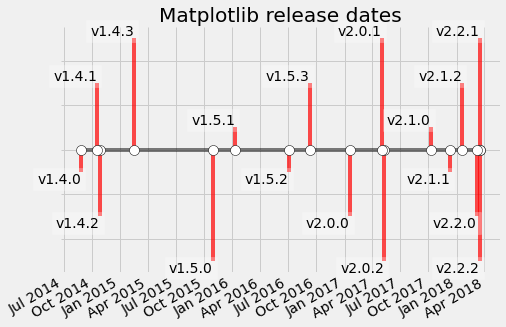

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

plt.style.use('fivethirtyeight')
# A list of Matplotlib releases and their dates
# Taken from https://api.github.com/repos/matplotlib/matplotlib/releases
names = ['v2.2.2', 'v2.2.1', 'v2.2.0', 'v2.1.2', 'v2.1.1', 'v2.1.0', 'v2.0.2',
         'v2.0.1', 'v2.0.0', 'v1.5.3', 'v1.5.2', 'v1.5.1', 'v1.5.0', 'v1.4.3',
         'v1.4.2', 'v1.4.1', 'v1.4.0']

dates = ['2018-03-17T03:00:07Z', '2018-03-16T22:06:39Z',
         '2018-03-06T12:53:32Z', '2018-01-18T04:56:47Z',
         '2017-12-10T04:47:38Z', '2017-10-07T22:35:12Z',
         '2017-05-10T02:11:15Z', '2017-05-02T01:59:49Z',
         '2017-01-17T02:59:36Z', '2016-09-09T03:00:52Z',
         '2016-07-03T15:52:01Z', '2016-01-10T22:38:50Z',
         '2015-10-29T21:40:23Z', '2015-02-16T04:22:54Z',
         '2014-10-26T03:24:13Z', '2014-10-18T18:56:23Z',
         '2014-08-26T21:06:04Z']
dates = [datetime.strptime(ii, "%Y-%m-%dT%H:%M:%SZ") for ii in dates]


levels = np.array([-5, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(7,5))

# Create the base line
start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

# Iterate through releases annotating each one
for ii, (iname, idate) in enumerate(zip(names, dates)):
    level = levels[ii % 6]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    # Plot a line up to the text
    ax.plot((idate, idate), (0, level), c='r', alpha=.7)
    # Give the text a faint background and align it properly
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
ax.set(title="Matplotlib release dates")
# Set the xticks formatting
# format xaxis with 3 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=3))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
fig.autofmt_xdate()

# Remove components for a cleaner look
plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)
plt.show()